In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from torchvision import models, transforms, datasets
from torchvision.models import vgg16, VGG16_Weights
from torch.utils.data import DataLoader, Sampler
from AdaIN import AdaIN

In [2]:
vgg = vgg16(weights = VGG16_Weights.DEFAULT)
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [3]:
style_path = "style/sketch.png"
image_path = "content/avril.jpg"

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.ToTensor()
])

#coco content
train_content_dataset = datasets.ImageFolder(
    root= "../coco",             
    transform=transform
)

#wikiart
train_style_dataset = datasets.ImageFolder(
    root= "../archive",             
    transform=transform
)

train_content_loader = DataLoader(train_content_dataset, batch_size=1, shuffle=True)
train_style_loader = DataLoader(train_style_dataset, batch_size=1, shuffle=True)

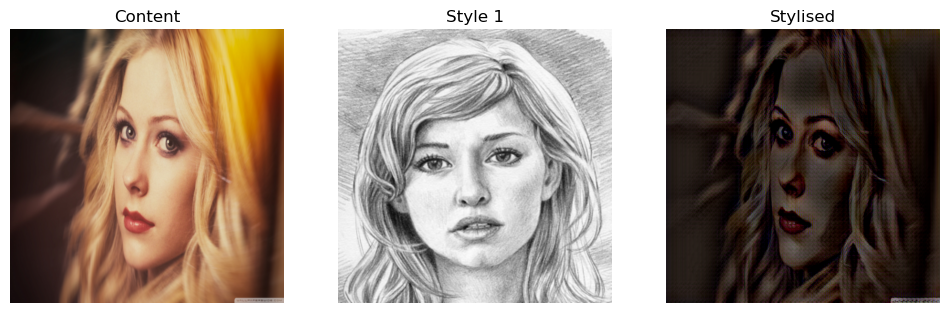

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/opt/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /opt/anaconda3/lib/python3.12/site-packages/lpips/weights/v0.1/alex.pth


(0.52, '869.190 ms')

In [7]:
encoder = nn.Sequential(*list(vgg.features.children())[:19])#Slice at 4-1 relu


decoder = nn.Sequential(    
            nn.ReflectionPad2d(1),
            nn.Conv2d(512, 256, 3),
            nn.ReLU(inplace=True),
            
            nn.Upsample(scale_factor=2, mode='nearest'),
            nn.ReflectionPad2d(1),
            nn.Conv2d(256, 256, 3),
            nn.ReLU(inplace=True),

            nn.ReflectionPad2d(1),
            nn.Conv2d(256, 256, 3),
            nn.ReLU(inplace=True),
            
            nn.ReflectionPad2d(1),
            nn.Conv2d(256, 128, 3),
            nn.ReLU(inplace=True),
            
            nn.Upsample(scale_factor=2, mode='nearest'),
            nn.ReflectionPad2d(1),
            nn.Conv2d(128, 128, 3),
            nn.ReLU(inplace=True),
            
            nn.ReflectionPad2d(1),
            nn.Conv2d(128, 64, 3),
            nn.ReLU(inplace=True),
            
            nn.Upsample(scale_factor=2, mode='nearest'),
            nn.ReflectionPad2d(1),
            nn.Conv2d(64, 64, 3),
            nn.ReLU(inplace=True),

            
            nn.ReflectionPad2d(1),
            nn.Conv2d(64, 3, 3),
        )



vgg16Model = AdaIN(prebuild_decoder = "vgg16_5.pth")
vgg16Model.uploadEncoder(encoder)
vgg16Model.uploadDecoder(decoder)
# vgg16Model.epochTraining(train_content_loader, train_style_loader, "vgg16", steps = 20000, epoch = 5)
vgg16Model.setup()
vgg16Model.fit(image_path,[style_path])
vgg16Model.pipeline()
vgg16Model.displayImages()
vgg16Model.evaluate()

Epoch: 1
[1000/20000] content=1.9264 style=0.5068 total=2.433223
[2000/20000] content=1.6007 style=0.3325 total=1.933276
[3000/20000] content=1.5089 style=0.2934 total=1.802315
[4000/20000] content=1.4262 style=0.2712 total=1.697332
[5000/20000] content=1.3596 style=0.2504 total=1.610037
[6000/20000] content=1.3128 style=0.2367 total=1.549475
[7000/20000] content=1.2835 style=0.2279 total=1.511386
[8000/20000] content=1.2310 style=0.2185 total=1.449568
[9000/20000] content=1.2586 style=0.2228 total=1.481487
[10000/20000] content=1.2248 style=0.2105 total=1.435244
[11000/20000] content=1.2133 style=0.2097 total=1.422967
[12000/20000] content=1.2122 style=0.2104 total=1.422552
[13000/20000] content=1.1583 style=0.1967 total=1.355017
[14000/20000] content=1.1669 style=0.2002 total=1.367056
[15000/20000] content=1.1583 style=0.1957 total=1.353982
[16000/20000] content=1.1750 style=0.1966 total=1.371669
[17000/20000] content=1.1453 style=0.1946 total=1.339888
[18000/20000] content=1.1479 st

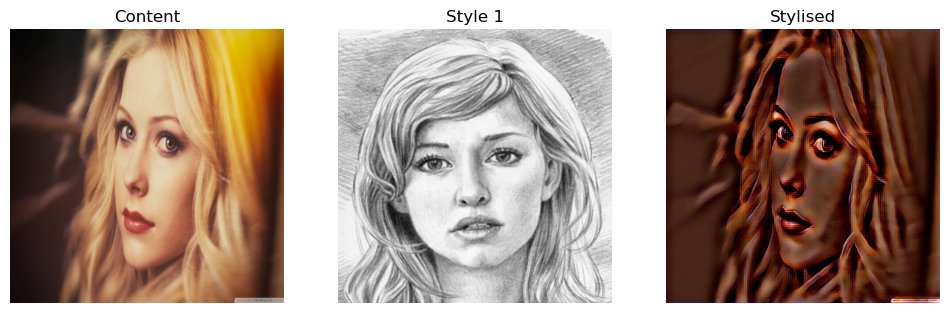

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /opt/anaconda3/lib/python3.12/site-packages/lpips/weights/v0.1/alex.pth


(0.461, '8952.435 ms')

In [11]:
encoder_new = nn.Sequential(*list(vgg.features.children())[:16])#Slice at 3-3 relu

decoder_new = nn.Sequential(    
            nn.ReflectionPad2d(1),
            nn.Conv2d(256, 256, 3),
            nn.ReLU(inplace=True),
            
            nn.Upsample(scale_factor=2, mode='nearest'),
            nn.ReflectionPad2d(1),
            nn.Conv2d(256, 256, 3),
            nn.ReLU(inplace=True),

            nn.ReflectionPad2d(1),
            nn.Conv2d(256, 256, 3),
            nn.ReLU(inplace=True),
            
            nn.ReflectionPad2d(1),
            nn.Conv2d(256, 128, 3),
            nn.ReLU(inplace=True),
            
            nn.Upsample(scale_factor=2, mode='nearest'),
            nn.ReflectionPad2d(1),
            nn.Conv2d(128, 128, 3),
            nn.ReLU(inplace=True),
            
            nn.ReflectionPad2d(1),
            nn.Conv2d(128, 64, 3),
            nn.ReLU(inplace=True),
            
            nn.Upsample(scale_factor=2, mode='nearest'),
            nn.ReflectionPad2d(1),
            nn.Conv2d(64, 64, 3),
            nn.ReLU(inplace=True),

            
            nn.ReflectionPad2d(1),
            nn.Conv2d(64, 3, 3),
        )

vgg16Model2 = AdaIN()
vgg16Model2.uploadEncoder(encoder_new)
vgg16Model2.uploadDecoder(decoder_new)
vgg16Model2.epochTraining(train_content_loader, train_style_loader, "vgg16_3-3relu", steps = 20000, epoch = 5)
vgg16Model2.fit(image_path,[style_path])
vgg16Model2.pipeline()
vgg16Model2.displayImages()
vgg16Model2.evaluate()

Epoch: 1
[1000/20000] content=1.2189 style=0.3485 total=1.567406
[2000/20000] content=1.0084 style=0.2928 total=1.301214
[3000/20000] content=0.9478 style=0.2772 total=1.225054
[4000/20000] content=0.9028 style=0.2702 total=1.173037
[5000/20000] content=0.8912 style=0.2644 total=1.155631
[6000/20000] content=0.8819 style=0.2704 total=1.152321
[7000/20000] content=0.8627 style=0.2593 total=1.122038
[8000/20000] content=0.8584 style=0.2575 total=1.115887
[9000/20000] content=0.8192 style=0.2457 total=1.064985
[10000/20000] content=0.8330 style=0.2509 total=1.083845
[11000/20000] content=0.8574 style=0.2625 total=1.119944
[12000/20000] content=0.8436 style=0.2569 total=1.100505
[13000/20000] content=0.8300 style=0.2505 total=1.080556
[14000/20000] content=0.8127 style=0.2455 total=1.058121
[15000/20000] content=0.8161 style=0.2455 total=1.061671
[16000/20000] content=0.8307 style=0.2559 total=1.086581
[17000/20000] content=0.8176 style=0.2465 total=1.064191
[18000/20000] content=0.8129 st

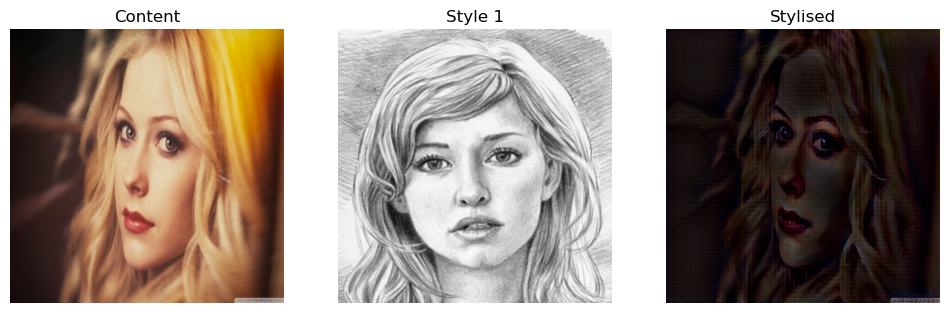

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /opt/anaconda3/lib/python3.12/site-packages/lpips/weights/v0.1/alex.pth


(0.625, '350.071 ms')

In [15]:
encoder_new_4_2 = nn.Sequential(*list(vgg.features.children())[:21])#Slice at 4-2 relu


vgg16Model3 = AdaIN()
vgg16Model3.uploadEncoder(encoder_new_4_2)
vgg16Model3.uploadDecoder(decoder)
vgg16Model3.epochTraining(train_content_loader, train_style_loader, "vgg16_4-2relu", steps = 20000, epoch = 5)
vgg16Model3.fit(image_path,[style_path])
vgg16Model3.pipeline()
vgg16Model3.displayImages()
vgg16Model3.evaluate()